In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokenizer import Tokenizer

from textblob import TextBlob

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
nlp = spacy.load('en_core_web_sm')
tokenizer = Tokenizer(nlp.vocab)

In [13]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Clickbaits,bait
0,0,North Korea to rejoin six-nation talks,0
1,1,Watch This Out Gay Marine Ask Singer Steve Gra...,1
2,2,Protester says Japanese whalers shot him,0
3,3,At least twelve die in Mogadishu attacks,0
4,4,Can Strangers Match Couples,1


In [14]:
def calculator(sentence):
    arr = sentence.split(" ")
    totalChar = len(sentence)-(len(arr)-1)
    avgWordLength = totalChar/len(arr)
    
    s = sentence
    tokens = tokenizer(s)
    
    stopWords = 0
    for token in tokens:
        if token.is_stop == True:
            stopWords += 1
    
    stopWordtoContentWord = stopWords/len(arr)
    
    return avgWordLength,stopWordtoContentWord,len(arr)

In [15]:
df["Length"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["AvgWordLength"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["StoptoContent"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["Cardinality"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["WordCount"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["Verb"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["Auxiliary"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)
df["CoorConj"] = np.zeros((len(df["Clickbaits"]),1),dtype=float)

for i in range(len(df["Clickbaits"])):
    df["Length"][i] = len(df["Clickbaits"][i])
    
    avgWordLength,stopWordtoContentWord,wordCount = calculator(df["Clickbaits"][i])
    
    df["AvgWordLength"][i] = avgWordLength
    df["StoptoContent"][i] = stopWordtoContentWord
    df["WordCount"][i]     = wordCount

/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [16]:
lenData = len(df)

In [17]:
num = 0
verb = 0
aux = 0
cconj = 0

for i in range(lenData):
    doc = nlp(df["Clickbaits"][i])
    for token in doc:
        if token.pos_ == "NUM":
            num += 1
        if token.pos_ == "VERB":
            verb += 1
        if token.pos_ == "AUX":
            aux += 1
        if token.pos_ == "CCONJ":
            cconj += 1
        
    df["Cardinality"][i] = num
    df["Verb"][i] = verb
    df["Auxiliary"][i] = aux
    df["CoorConj"][i] = cconj

/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/prajwol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21

In [18]:
# df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Unnamed: 0,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj
0,0,North Korea to rejoin six-nation talks,0,38.0,5.500000,0.166667,1.0,6.0,1.0,0.0,0.0
1,1,Watch This Out Gay Marine Ask Singer Steve Gra...,1,73.0,4.285714,0.285714,1.0,14.0,2.0,0.0,0.0
2,2,Protester says Japanese whalers shot him,0,40.0,5.833333,0.166667,1.0,6.0,4.0,0.0,0.0
3,3,At least twelve die in Mogadishu attacks,0,40.0,4.857143,0.571429,2.0,7.0,4.0,0.0,0.0
4,4,Can Strangers Match Couples,1,27.0,6.000000,0.250000,2.0,4.0,6.0,0.0,0.0


In [19]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [20]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df["polarity"] = df["Clickbaits"].apply(pol)
df["subjectivity"] = df["Clickbaits"].apply(sub)
df.head()

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,North Korea to rejoin six-nation talks,0,38.0,5.500000,0.166667,1.0,6.0,1.0,0.0,0.0,0.000000,0.000000
1,Watch This Out Gay Marine Ask Singer Steve Gra...,1,73.0,4.285714,0.285714,1.0,14.0,2.0,0.0,0.0,0.458333,0.791667
2,Protester says Japanese whalers shot him,0,40.0,5.833333,0.166667,1.0,6.0,4.0,0.0,0.0,0.000000,0.000000
3,At least twelve die in Mogadishu attacks,0,40.0,4.857143,0.571429,2.0,7.0,4.0,0.0,0.0,-0.300000,0.400000
4,Can Strangers Match Couples,1,27.0,6.000000,0.250000,2.0,4.0,6.0,0.0,0.0,0.000000,0.000000


In [21]:
# Correction Matrix Plot
data = df.copy()
data.drop(["Clickbaits","bait"],axis=1,inplace=True)
correlations = data.corr()

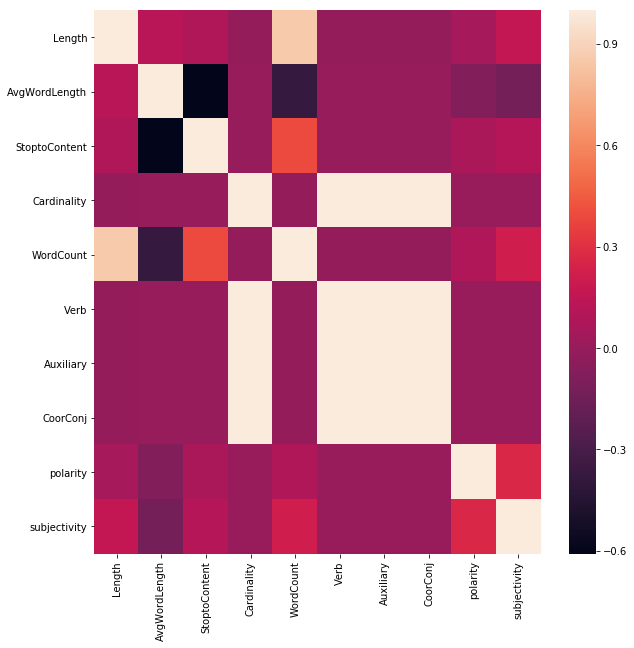

In [22]:
plt.figure(figsize=(10, 10))
corrPlotSNS = sns.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns)
fig = corrPlotSNS.get_figure()
fig.savefig("Correlation.png")

In [23]:
df.to_csv("./featurextacted.csv")

In [ ]:
target = df.bait
data = df.drop(["Clickbaits","bait"],axis=1)

# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=250)
tsne_results = tsne.fit_transform(X)

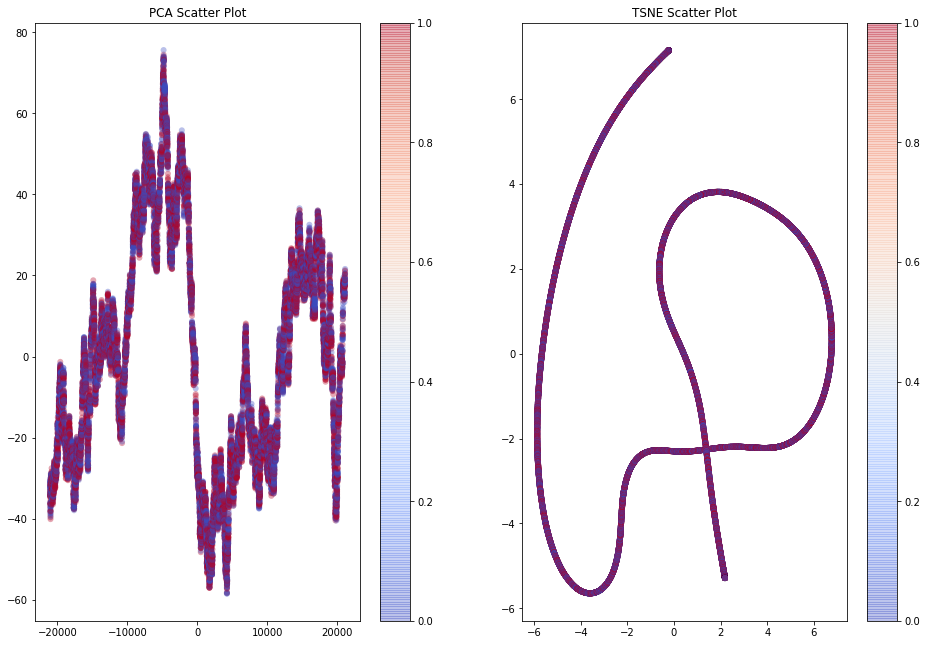

In [45]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.savefig("PCAandTNSE.png")
plt.show()

In [46]:
target = df.bait
data = df.drop(["Clickbaits","bait"],axis=1)

In [66]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(data)

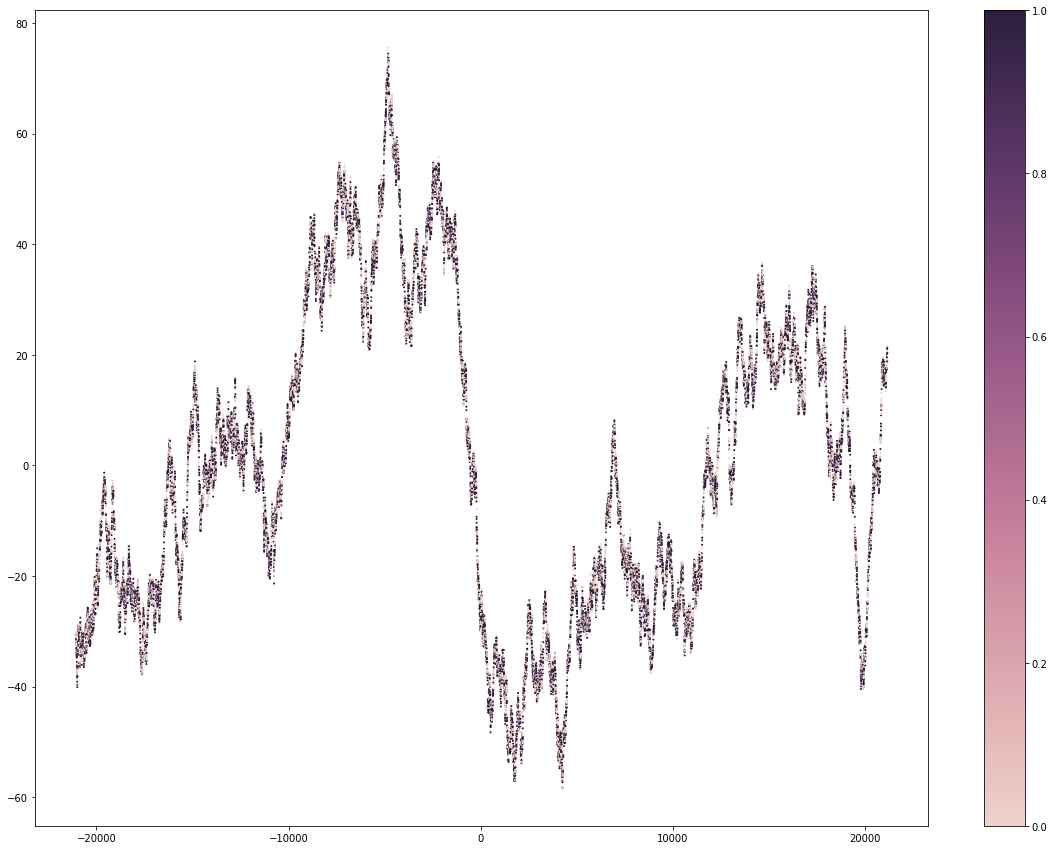

In [67]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0], pca2_results[:,1], c=target, s=1, cmap=cmap)
f.colorbar(points)
plt.show()

In [74]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2,perplexity=300.0,n_iter=4000)
tsne2_results = tsne2.fit_transform(data)

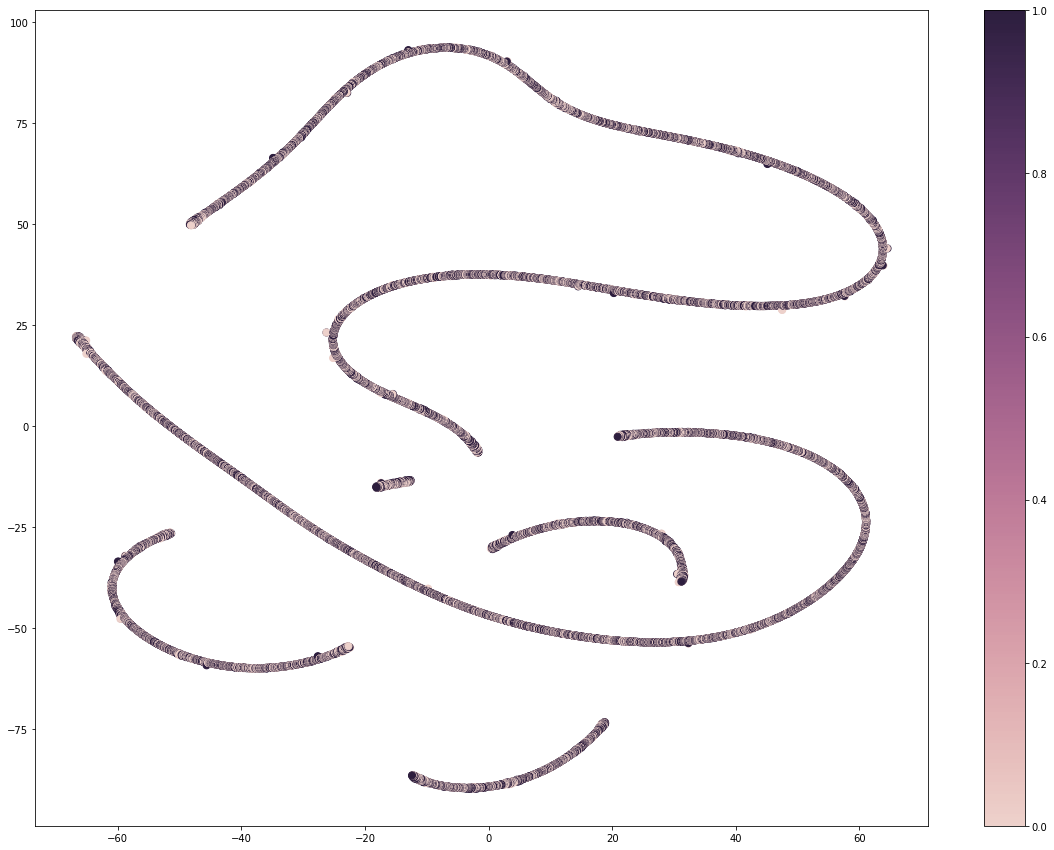

In [75]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne2_results[:,0], tsne2_results[:,1], c=target, s=50, cmap=cmap)
f.colorbar(points)
plt.savefig("TSNE.png")
plt.show()

In [26]:
df.head()

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,25 Adorable Animals To Brighten Your Day,1,40.0,4.857143,0.285714,1.0,7.0,1.0,0.0,0.0,0.5,1.0
1,Myanmar Junta threatened with sanctions by UN ...,0,50.0,5.375000,0.250000,1.0,8.0,2.0,0.0,0.0,0.0,0.0
2,Fannie Mae Says It Needs Another $15 Billion,0,44.0,4.625000,0.250000,3.0,8.0,4.0,0.0,0.0,0.0,0.0
3,World's most-spammed man,0,24.0,7.333333,0.000000,3.0,3.0,5.0,0.0,0.0,0.0,0.0
4,Yankees power surge blacks out Sox relief in 8...,0,52.0,4.300000,0.200000,5.0,10.0,6.0,0.0,0.0,0.8,0.4
